<a href="https://colab.research.google.com/github/fongn1/titanic-analysis/blob/main/2025_Task_02_%E4%BD%9C%E6%A5%AD_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DataFrame Head:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   N

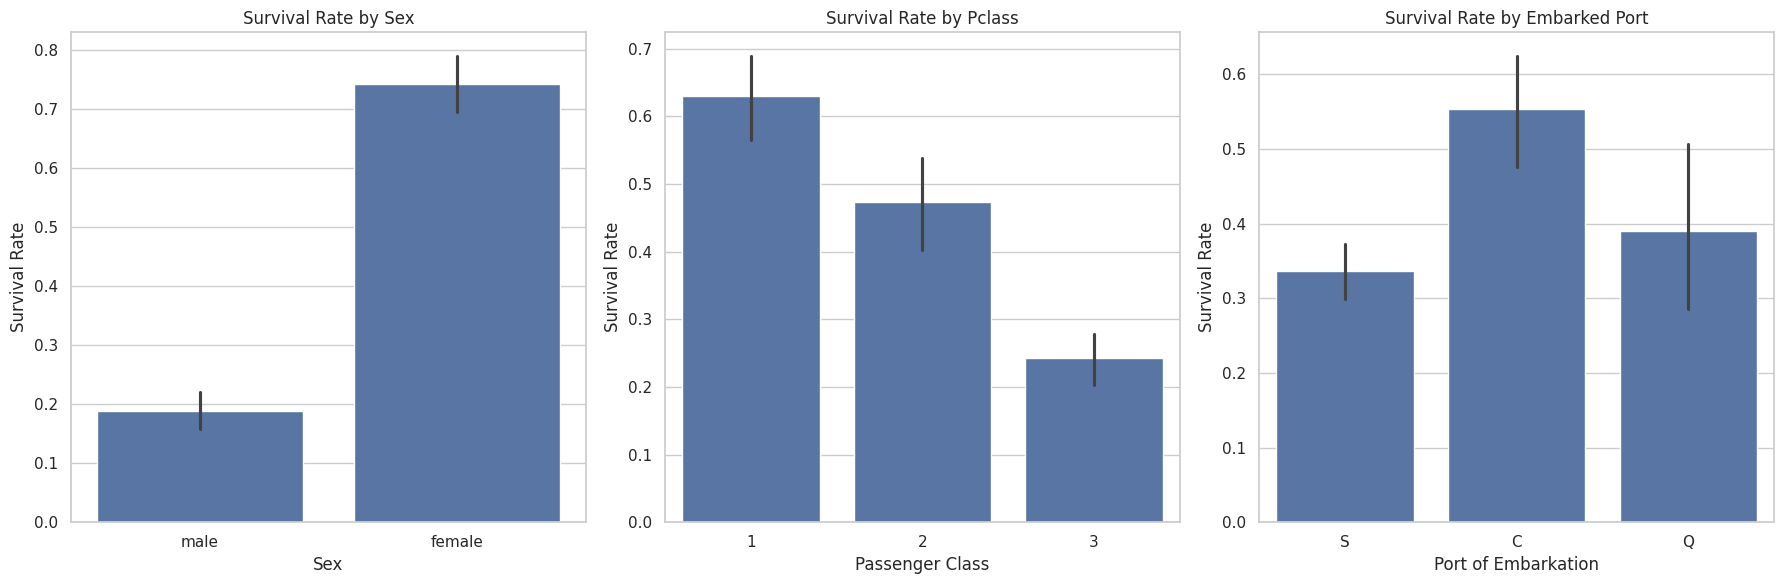

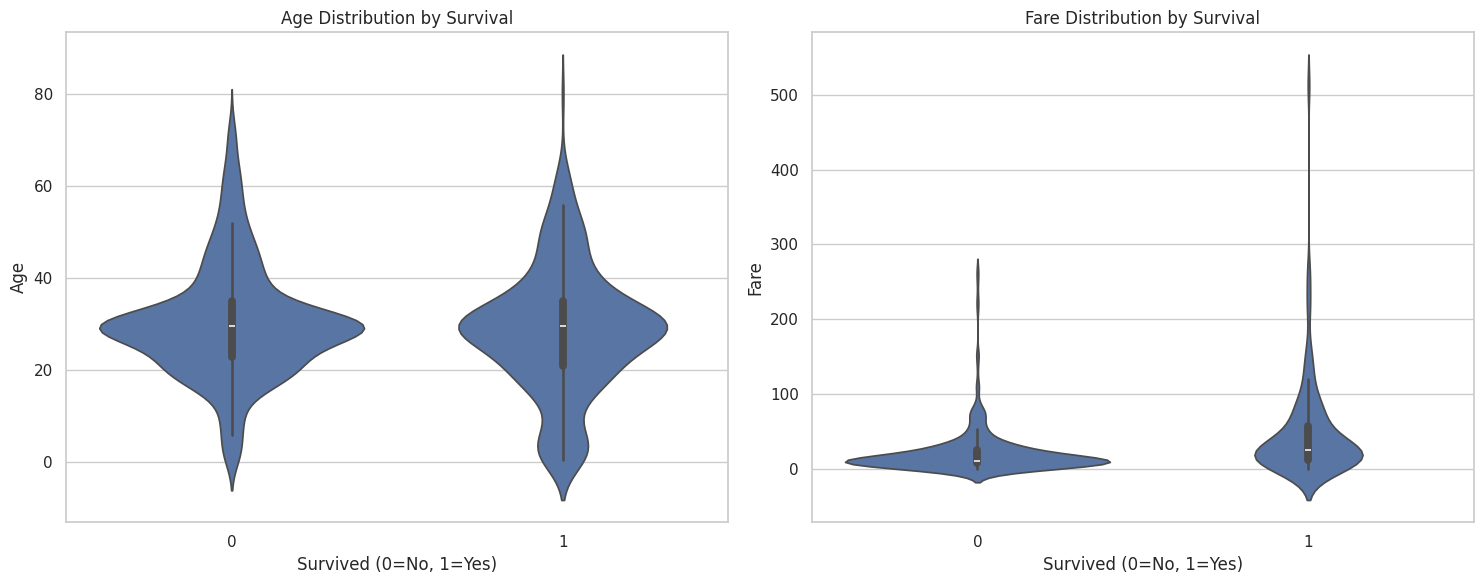

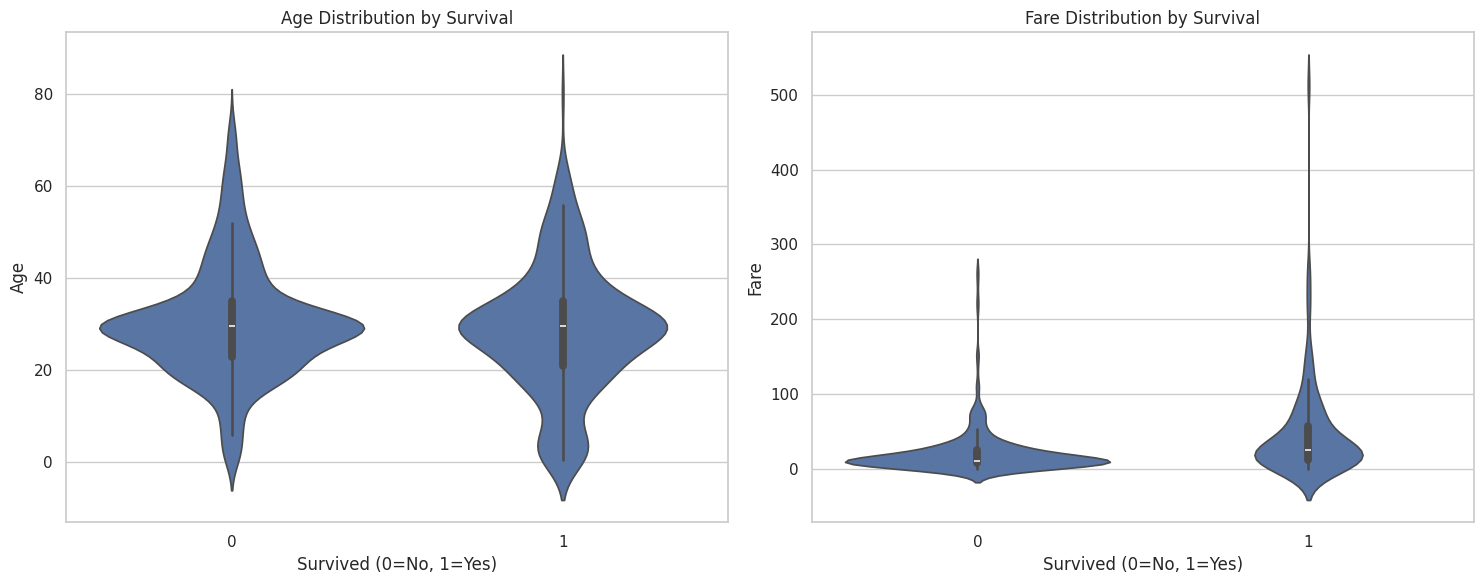


Correlation Analysis with 'Survived' column
Survived       1.000000
Sex            0.543351
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.069809
Pclass        -0.338481
Name: Survived, dtype: float64


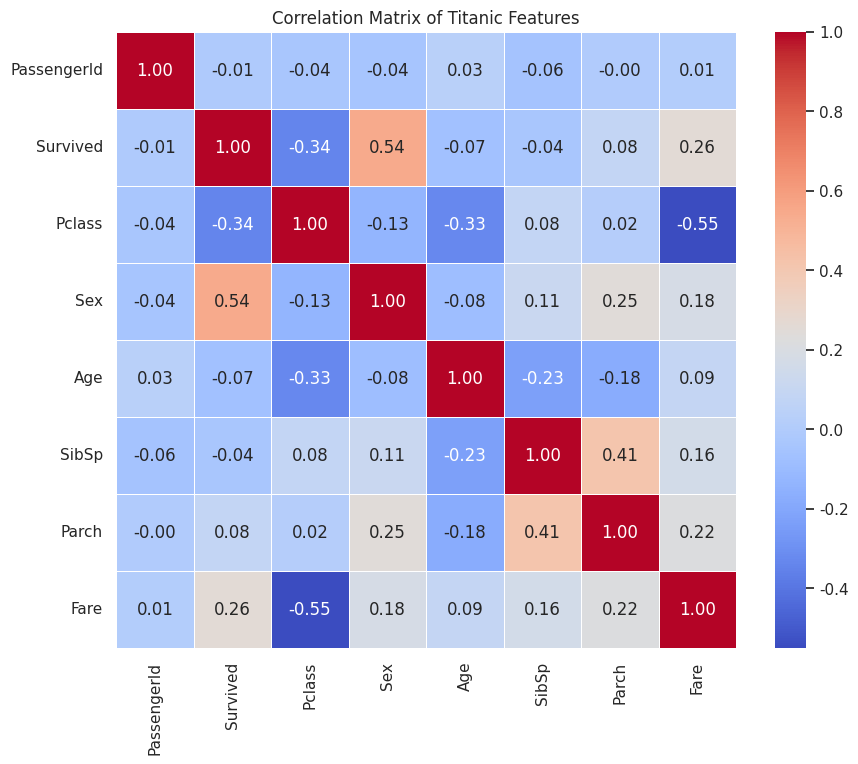

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 載入資料
df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')

print("DataFrame Head:")
print(df.head())

'''
欄位名稱 描述
PassengerId 乘客的唯一識別碼。
Survived 乘客是否生還。 0 = 否，1 = 是。
Pclass 艙等，代表社會經濟地位。1 = 頭等艙，2 = 二等艙，3 = 三等艙。
Name 乘客的姓名。
Sex 乘客的性別。
Age 乘客的年齡，可能包含小數點。部分乘客的年齡未知。
SibSp 船上兄弟姊妹或配偶的數量。
Parch 船上父母或子女的數量。
Ticket 船票號碼。
Fare 支付的船票費用。
Cabin 船艙號碼，許多乘客的船艙號碼未知。
Embarked 登船港口。C = Cherbourg，Q = Queenstown，S = Southampton。
'''

# 設定圖表樣式
sns.set_theme(style="whitegrid")

# --- 1. Categorical Features vs. Survival ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Survival Rate by Sex
sns.barplot(ax=axes[0], x='Sex', y='Survived', data=df)
axes[0].set_title('Survival Rate by Sex')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Survival Rate')

# Survival Rate by Pclass
sns.barplot(ax=axes[1], x='Pclass', y='Survived', data=df)
axes[1].set_title('Survival Rate by Pclass')
axes[1].set_xlabel('Passenger Class')
axes[1].set_ylabel('Survival Rate')

# Survival Rate by Embarked
sns.barplot(ax=axes[2], x='Embarked', y='Survived', data=df)
axes[2].set_title('Survival Rate by Embarked Port')
axes[2].set_xlabel('Port of Embarkation')
axes[2].set_ylabel('Survival Rate')
plt.tight_layout()
plt.show()

# --- 2. Numerical Features vs. Survival ---
# Fill missing Age values for plotting
df['Age'] = df['Age'].fillna(df['Age'].mean())

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Age vs. Survival
sns.violinplot(ax=axes[0], x='Survived', y='Age', data=df)
axes[0].set_title('Age Distribution by Survival')
axes[0].set_xlabel('Survived (0=No, 1=Yes)')
axes[0].set_ylabel('Age')

# Fare vs. Survival
sns.violinplot(ax=axes[1], x='Survived', y='Fare', data=df)
axes[1].set_title('Fare Distribution by Survival')
axes[1].set_xlabel('Survived (0=No, 1=Yes)')
axes[1].set_ylabel('Fare')

plt.tight_layout()
plt.show()
# --- 2. Numerical Features vs. Survival ---
# Fill missing Age values for plotting
df['Age'] = df['Age'].fillna(df['Age'].mean())

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Age vs. Survival
sns.violinplot(ax=axes[0], x='Survived', y='Age', data=df)
axes[0].set_title('Age Distribution by Survival')
axes[0].set_xlabel('Survived (0=No, 1=Yes)')
axes[0].set_ylabel('Age')

# Fare vs. Survival
sns.violinplot(ax=axes[1], x='Survived', y='Fare', data=df)
axes[1].set_title('Fare Distribution by Survival')
axes[1].set_xlabel('Survived (0=No, 1=Yes)')
axes[1].set_ylabel('Fare')

plt.tight_layout()
plt.show()

# --- 3. Correlation Analysis ---
print("\n" + "="*40)
print("Correlation Analysis with 'Survived' column")
print("="*40)

# Create a copy to avoid modifying the original DataFrame
df_corr = df.copy()

# Convert 'Sex' to numerical values for correlation calculation
df_corr['Sex'] = df_corr['Sex'].map({'male': 0, 'female': 1})

# Calculate the correlation matrix
correlation_matrix = df_corr.corr(numeric_only=True)

# Print sorted correlation values with 'Survived'
print(correlation_matrix['Survived'].sort_values(ascending=False))

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Titanic Features')
plt.show()

/tmp/ipython-input-1717517670.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-1717517670.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

------------------------------------------------------------
Top 10 Feature Importances:
      Feature  Importance
4        Fare    0.271319
1         Age    0.266636
5    Sex_male    0.256999
0      Pclass    0.081842
2       SibSp    0.051118
3       Parch    0.039674
7  Embarked_S    0.022001
6  Embarked_Q    0.010410


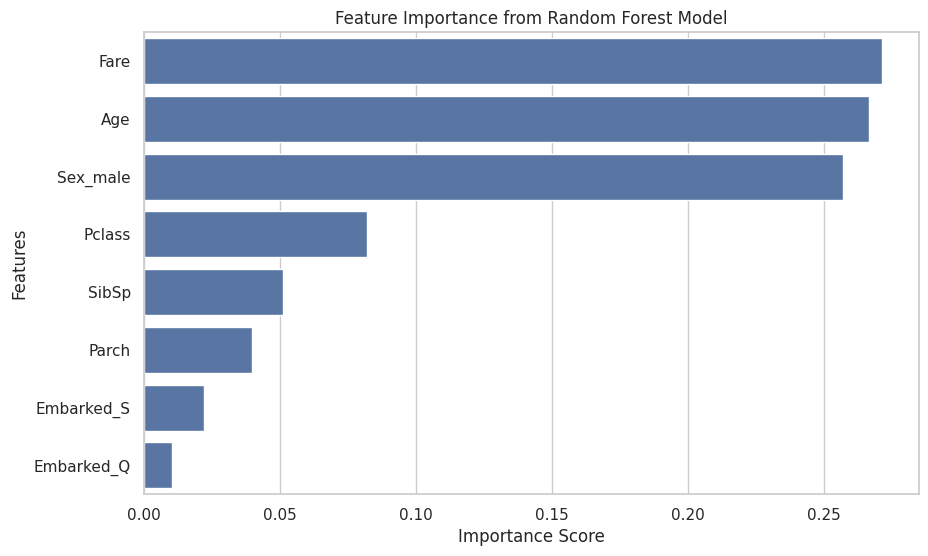

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')

# --- Data Preprocessing for the Model ---
# Drop irrelevant columns
df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

# Fill missing values
# Age: Fill with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)
# Embarked: Fill with the mode (most frequent value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Convert categorical features to numerical format
# We'll use one-hot encoding for 'Sex' and 'Embarked'
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# --- Feature Importance Calculation ---
# Define features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Initialize and train a Random Forest model
# We set random_state for reproducibility
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances from the trained model
importances = model.feature_importances_

# Create a DataFrame to store the importances and feature names
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# --- Visualization of Feature Importance ---
print("---" * 20)
print("Top 10 Feature Importances:")
print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()